In [1]:
from keras.models import Sequential 
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')


In [2]:
seed=7
np.random.seed(seed)
gas=pd.read_csv(r"C:/ExcelR/gas_turbines.csv")


In [3]:
gas = gas.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)


In [4]:
gas

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [5]:
gas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
gas.describe()


,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


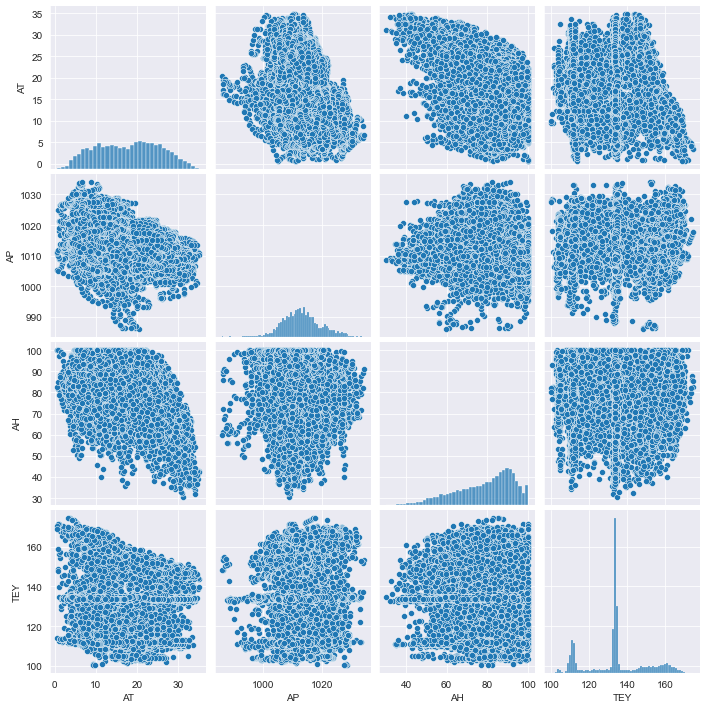

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.pairplot(gas)
plt.show()


In [8]:
X=gas.iloc[:,0:3]
Y=gas.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)


In [9]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [11]:
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)


MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [12]:
len(xtrain_scale)


10527

In [13]:
model =Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)


Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 0.1795 - mse: 0.1795 - mae: 0.3667 - val_loss: 0.1063 - val_mse: 0.1063 - val_mae: 0.2733
Epoch 2/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0685 - mse: 0.0685 - mae: 0.2129 - val_loss: 0.0491 - val_mse: 0.0491 - val_mae: 0.1652
Epoch 3/100
48/48 [==============================] - 0s 6ms/step - loss: 0.0467 - mse: 0.0467 - mae: 0.1554 - val_loss: 0.0484 - val_mse: 0.0484 - val_mae: 0.1599
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0465 - mse: 0.0465 - mae: 0.1547 - val_loss: 0.0481 - val_mse: 0.0481 - val_mae: 0.1589
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0463 - mse: 0.0463 - mae: 0.1547 - val_loss: 0.0479 - val_mse: 0.0479 - val_mae: 0.1584
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1542 - val_loss: 0.0477 - val_mse: 0.0477 - val_mae: 0.1583
Epoch 7/100
48/48 [==

In [14]:
y_predict = model.predict(xtest_scale)  


141/141 [==============================] - 0s 2ms/step


In [15]:
print(hist.history.keys())


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [16]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()


,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038805,0.038805,0.156567,0.040383,0.040383,0.160101,95
96,0.038700,0.038700,0.156631,0.040291,0.040291,0.159844,96
97,0.038597,0.038597,0.156727,0.040269,0.040269,0.160300,97
98,0.038746,0.038746,0.157574,0.040269,0.040269,0.160204,98
99,0.038647,0.038647,0.156504,0.040311,0.040311,0.160123,99
